In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 设置参数和生成原始向量
# 向量大小（人数）
n = 100
# 阳性数量
k = 5
# 随机种子
np.random.seed(1)
# 原始向量（n维，k稀疏）
x_orig = np.zeros(n)
S = np.random.randint(n, size=k)
x_orig[S] = 1

# 生成检测矩阵和结果向量
# 检测次数
m = 20
# 检测矩阵
A = np.random.randint(2, size=(m, n))
# 结果向量
b = A @ x_orig

# 构建和求解优化问题
# 优化变量
x = cp.Variable(n)
# 成本函数（L1 范数）
cost = cp.norm1(x)
# 约束（线性方程）
constraints = [A @ x == b]
# 优化问题
prob = cp.Problem(cp.Minimize(cost), constraints)
# 通过 CVXPY 求解
prob.solve()

# 打印结果
print("status:", prob.status)
print("optimal value:", prob.value)
print("original vector non-zero indices:", S)
print("recovered vector non-zero indices:", np.where(x.value > 0.5)[0])

status: optimal
optimal value: 5.000000001570281
original vector non-zero indices: [37 12 72  9 75]
recovered vector non-zero indices: [ 9 12 37 72 75]


In [3]:
print(np.nonzero(x_orig))
x_eat=np.round(x.value)
print(x_eat.nonzero())

(array([ 9, 12, 37, 72, 75], dtype=int64),)
(array([ 9, 12, 37, 72, 75], dtype=int64),)


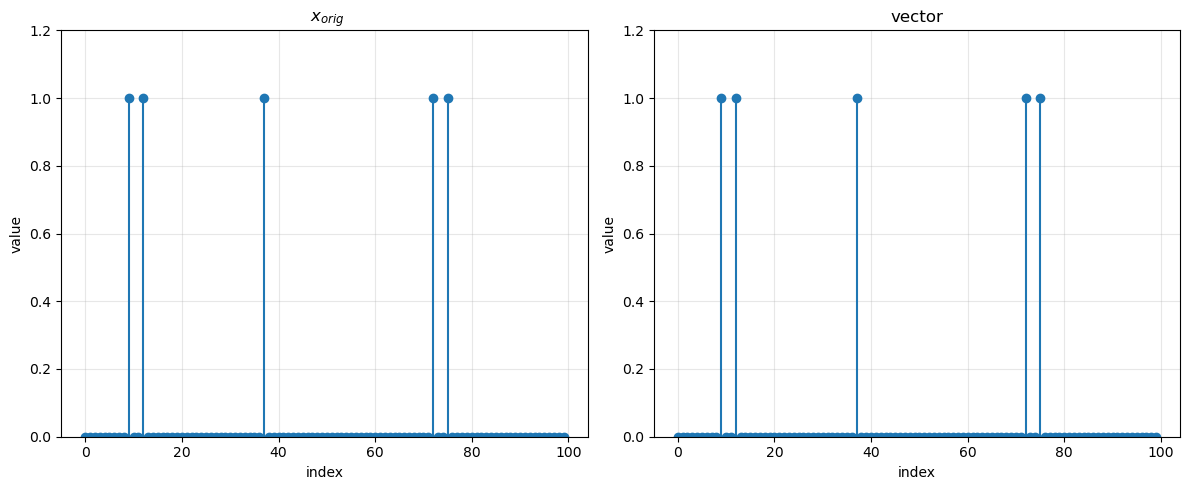

In [4]:
plt.figure(figsize=(12, 5))

# 左图：原始稀疏向量
plt.subplot(1, 2, 1)
plt.stem(range(n), x_orig, basefmt=" ", use_line_collection=True)
plt.title(' $x_{orig}$')
plt.xlabel('index')
plt.ylabel('value')
plt.ylim(0, 1.2)
plt.grid(True, alpha=0.3)

# 右图：重构的向量
plt.subplot(1, 2, 2)
plt.stem(range(n), x.value, basefmt=" ", use_line_collection=True)
plt.title('vector')
plt.xlabel('index')
plt.ylabel('value')
plt.ylim(0, 1.2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

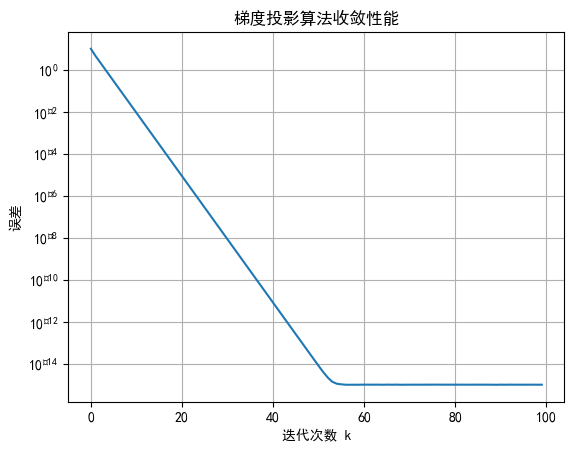

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ====== 参数设置 ======
m = 20  # 测试次数
n = 100  # 人数
k = 5   # 阳性人数

# ====== 生成原始向量 ======
np.random.seed(1)  # 设置随机种子保证结果可重现
x_orig = np.zeros(n)  # 创建全零向量
S = np.random.randint(n, size=k)  # 随机选择k个位置
x_orig[S] = 1  # 将选中的位置设为1（表示阳性）

# ====== 生成测试矩阵 ======
A = np.random.randint(2, size=(m, n))  # 创建m×n的随机二进制矩阵

# ====== 计算结果向量 ======
b = A @ x_orig  # 矩阵乘法：测试结果

# ====== 闭式解（参考解） ======
Ap = np.linalg.pinv(A)  # 计算A的Moore-Penrose伪逆
x_opt = Ap @ b  # 得到最优解

# ====== 梯度投影算法优化 ======
# 参数设置
alpha = 1.5     # 步长
max_itr = 100   # 最大迭代次数
x = np.random.randn(n)  # 随机初始猜测

# 预计算矩阵和向量
M = np.eye(n) - Ap @ A  # 投影矩阵
v = Ap @ b              # 偏置向量

error = np.zeros(max_itr)  # 存储每次迭代的误差

# ====== 迭代过程 ======
for k in range(max_itr):
    error[k] = np.linalg.norm(x_opt - x)  # 计算当前解与最优解的误差
    # 梯度投影更新公式
    x = M @ (x - alpha * x) + v

# ====== 误差分析 ======
fig = plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # 设置中文字体和备用字体
plt.semilogy(error)  # 使用对数坐标绘制误差
plt.xlabel("迭代次数 k")
plt.ylabel("误差")
plt.title("梯度投影算法收敛性能")
plt.grid(True)
plt.show()
